<a href="https://colab.research.google.com/github/NhuY26/CODE-DO-AN/blob/master/CODE_%C4%90%E1%BB%92_%C3%81N_M%C3%94N_PTDL_PYTHON_HK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Sử dụng tập tin Inc_Exp_Data.csv để thực hiện phân tích thống kê mô tả về tập dữ liệu này.**

	- Với tệp Inc_Exp_Data.csv:
Ta có các ký hiệu:
  - Mthly_HH_Income:	Thu nhập gia đình hàng tháng
  - Mthly_HH_Expense:	Chi phí hộ gia đình hàng tháng (Biến phụ thuộc)
  - No_of_Fly_Members:	Số thành viên trong gia đình
  - Emi_or_Rent_Amt:	số tiền thuê
  - Annual_HH_Income:	Thu nhập hộ gia đình hàng năm
  - Highest_Qualified_Member:	Trình độ học vấn cao nhất của thành viên gia đình
  - No_of_Earning_Members:	Số thành viên có thu nhập


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ĐỒ ÁN PYTHON HK2 (2022)/Inc_Exp_Data.csv")


Mounted at /content/drive


In [ ]:
#Hiển thị 5 dòng đầu của dữ liệu 

df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


In [ ]:
#Một vài thông tin cả dữ liệu 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [ ]:
#Dùng hàm 'describe()' để tính toán các thông số của dữ liệu có khả năng là định lượng một cách nhanh chóng

numeric_data = list(df.describe())

In [ ]:
result = pd.DataFrame()
for i in range(0,6):
  result[numeric_data[i]] = df[numeric_data[i]].describe()
result

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


Kết luận: Sau khi quan sát dữ liệu từ các bảng ta nhận thấy có 6 biến định lượng như sau:


- Mthly_HH_Income
- Mthly_HH_Expense
- No_of_Fly_Members
- Emi_or_Rent_Amt
- Annual_HH_Income
- No_of_Earning_Members

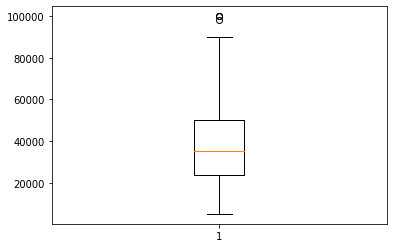

In [ ]:
#Vẽ boxplo cho Mthly_HH_Income

Mthly_HH_Income = df["Mthly_HH_Income"].dropna()
plt.boxplot(Mthly_HH_Income);

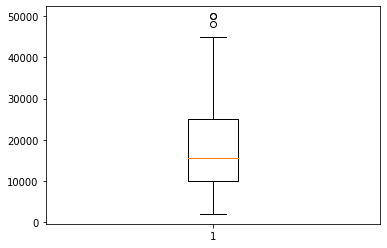

In [ ]:
#Vẽ boxplo cho Mthly_HH_Expense

Mthly_HH_Expense = df["Mthly_HH_Expense"].dropna()
plt.boxplot(Mthly_HH_Expense);

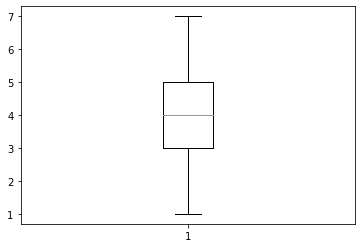

In [ ]:
#Vẽ boxplo cho No_of_Fly_Members

No_of_Fly_Members = df["No_of_Fly_Members"].dropna()
plt.boxplot(No_of_Fly_Members);

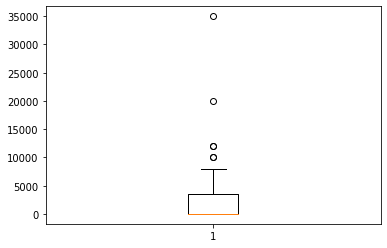

In [ ]:
# Vẽ boxplo cho Emi_or_Rent_Amt

Emi_or_Rent_Amt = df["Emi_or_Rent_Amt"].dropna()
plt.boxplot(Emi_or_Rent_Amt);

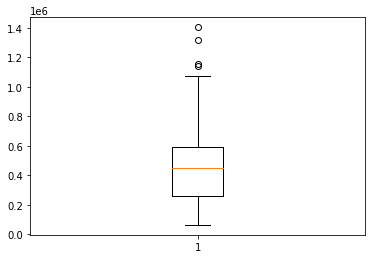

In [ ]:
#Vẽ boxplo cho Annual_HH_Income

Annual_HH_Income = df["Annual_HH_Income"].dropna()
plt.boxplot(Annual_HH_Income);

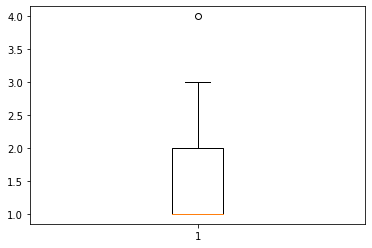

In [ ]:
#Vẽ boxplo cho No_of_Earning_Members

No_of_Earning_Members = df["No_of_Earning_Members"].dropna()
plt.boxplot(No_of_Earning_Members);

In [ ]:
#Tính độ tương quan (correlation) giữa các cột định lượng

corr = df.corr(method='pearson')
corr

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


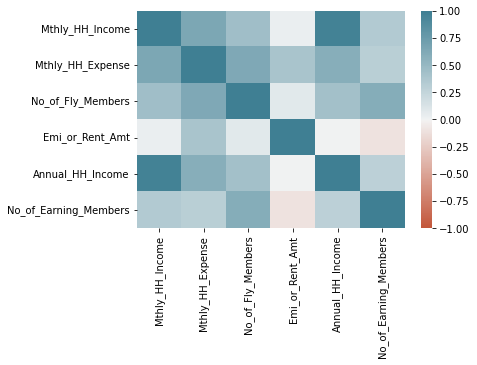

In [ ]:
#Từ bảng 'correlation matrix' vẽ heat map (biểu đồ nhiệt)

sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True));

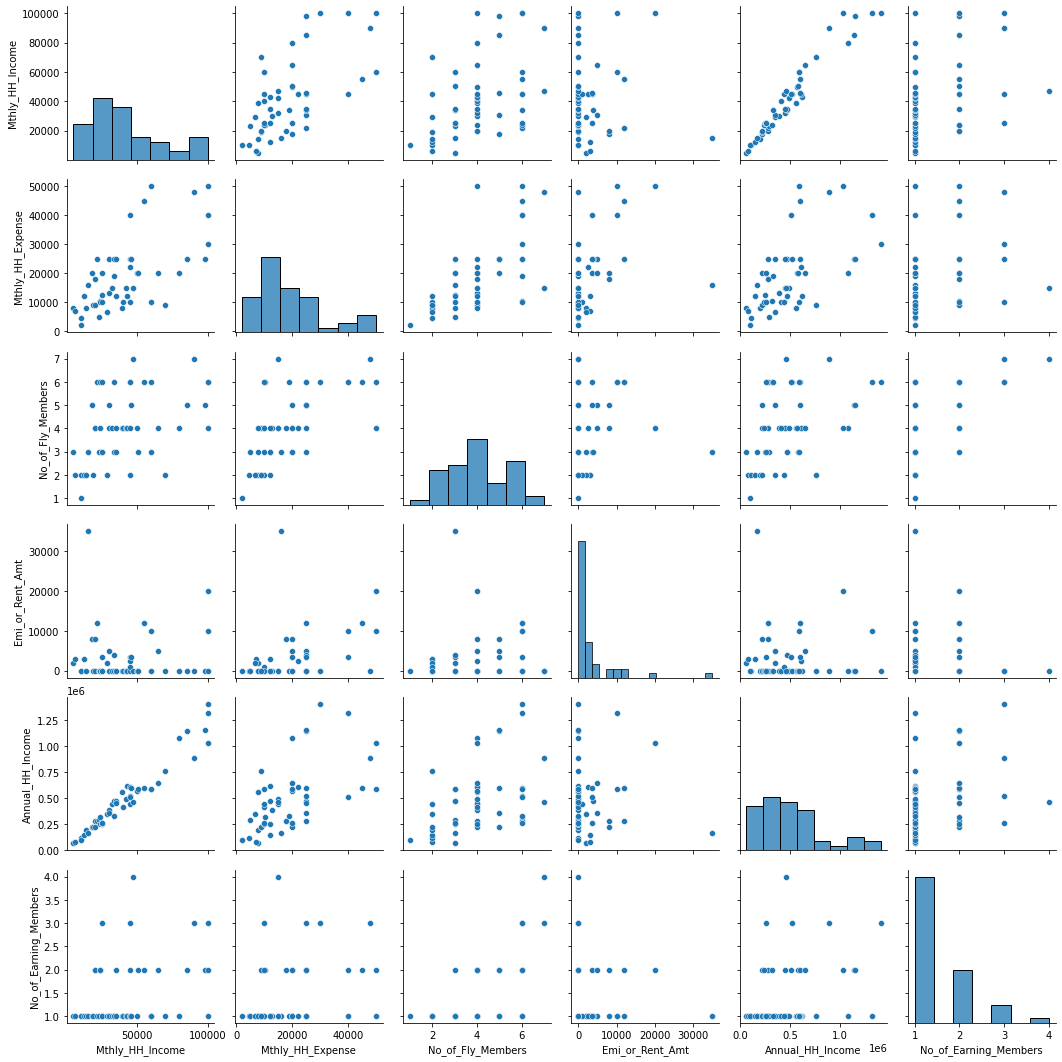

In [ ]:
#Từ correlation matrix vẽ pair plot (biểu đồ cặp)


%matplotlib inline 
sns.pairplot(df)
	    



In [ ]:
#Cộng đa tuyến:

import statsmodels.formula.api as sma 

m_linear_mod = sma.ols( formula = "Mthly_HH_Expense ~ Mthly_HH_Income + No_of_Fly_Members + Emi_or_Rent_Amt", data = df).fit() 

m_linear_mod.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Tue, 31 May 2022   Prob (F-statistic):           5.17e-12
Time:                        17:02:33   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Phương sai:
from patsy import dmatrices 
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

y, X = dmatrices(""" Mthly_HH_Expense ~ Mthly_HH_Income  + No_of_Fly_Members + Emi_or_Rent_Amt + Annual_HH_Income""", data= df,
     return_type="dataframe") 

vif = pd.DataFrame([VIF(X.values, i) for i in range(X.shape[1])], 
     index=X.columns, columns=['VIF_value'])

Đối với các cột dữ liệu định tính:
- 1. Vẽ biểu đồ cột dạng đứng
- 2. Vẽ biểu đồ cột dạng ngang
- 3. Vẽ biểu đồ Pareto

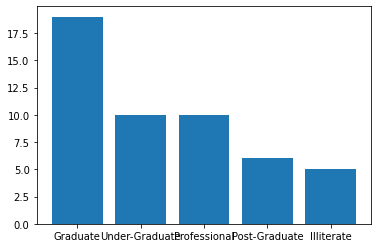

In [ ]:
#1. Vẽ biểu đồ cột dạng đứng cho Highest_Qualified_Member

x = dict(df["Highest_Qualified_Member"].value_counts()).keys()
y = dict(df["Highest_Qualified_Member"].value_counts()).values()
plt.bar(x,y);

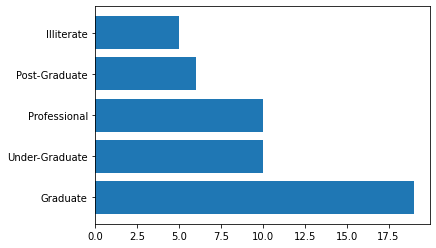

In [ ]:
#2. Vẽ biểu đồ cột dạng ngang cho Highest_Qualified_Member
x = dict(df["Highest_Qualified_Member"].value_counts()).keys()
y = dict(df["Highest_Qualified_Member"].value_counts()).values()
plt.barh(list(x),list(y));

**Vẽ biểu đồ Pareto cho Highest_Qualified_Member**



In [ ]:
#Thực hiện việc lập bảng tần số và phân trăm tích lũy tương ứng như sau:

Pareto_data = pd.DataFrame()
Pareto_data["count"] = df["Highest_Qualified_Member"].value_counts().sort_values(ascending=False)
Pareto_data['cumperc'] = Pareto_data['count'].cumsum()/Pareto_data['count'].sum()*100
Pareto_data

,count,cumperc
Graduate,19,38.0
Under-Graduate,10,58.0
Professional,10,78.0
Post-Graduate,6,90.0
Illiterate,5,100.0


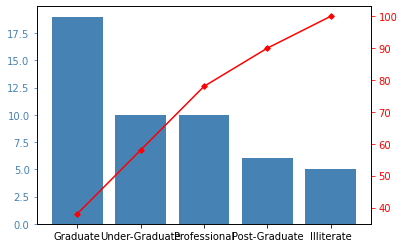

In [ ]:
# Vẽ biểu đồ pareto:

color1 = 'steelblue'
color2 = 'red'
line_size = 4

fig, ax = plt.subplots()
ax.bar(Pareto_data.index, Pareto_data['count'], color=color1)

ax2 = ax.twinx()
ax2.plot(Pareto_data.index, Pareto_data['cumperc'], color=color2, marker="D", ms=line_size)

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

### **2. Sử dụng tập tin Diet_R.csv để thực hiện phân tích thống kê suy diễn - ANOVA một chiều.**

In [ ]:
#Các thư viện cần thiết 


import pandas as pd  
import matplotlib.pyplot as plt  
import statsmodels.api as sm  
from statsmodels.formula.api import ols  
import seaborn as sns  
import numpy as np  
from scipy import stats


In [ ]:
mydata = pd.read_csv("/content/drive/MyDrive/ĐỒ ÁN PYTHON HK2 (2022)/Diet_R.csv")

In [ ]:
#Hiển thị dữ liệu:
print(mydata.head())  


   Person gender  Age  Height  pre.weight  Diet  weight6weeks
0      25          41     171          60     2          60.0
1      26          32     174         103     2         103.0
2       1      0   22     159          58     1          54.2
3       2      0   46     192          60     1          54.0
4       3      0   55     170          64     1          63.3


In [ ]:
#Xuất ra 5 dòng dữ liệu:
print('The total number of rows in the dataset:', mydata.size)  

The total number of rows in the dataset: 546


In [ ]:
#Tổng phần trăm giá trị dữ liệu bị thiếu:
print('Percentage of missing values in the dataset: {:.2f}%'.format(mydata[mydata.gender == ' '].size / mydata.size * 100))  

Percentage of missing values in the dataset: 2.56%


In [ ]:
#Kiểm tra các giá trị còn thiếu:

print(mydata.gender.unique())   
print(mydata[mydata.gender == ' '])

[' ' '0' '1']
   Person gender  Age  Height  pre.weight  Diet  weight6weeks
0      25          41     171          60     2          60.0
1      26          32     174         103     2         103.0


In [ ]:
mydata.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


**Câu hỏi:** chế độ ăn kiêng nào tốt nhất để giảm cân? Dựa vào bảng số liệu nhận thấy có 3 chế độ. Vì vậy cần chia dữ liệu thành các nhóm có liên quan đến 3 chế độ này.

Từ các nhóm trên chúng ta sẽ tiến hành phân tích thông kê suy diễn ANOVA một chiều

In [ ]:
mydata.drop('Person', axis= 1, inplace= True)
mydata.head()

,gender,Age,Height,pre.weight,Diet,weight6weeks
0,,41,171,60,2,60.0
1,,32,174,103,2,103.0
2,0,22,159,58,1,54.2
3,0,46,192,60,1,54.0
4,0,55,170,64,1,63.3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


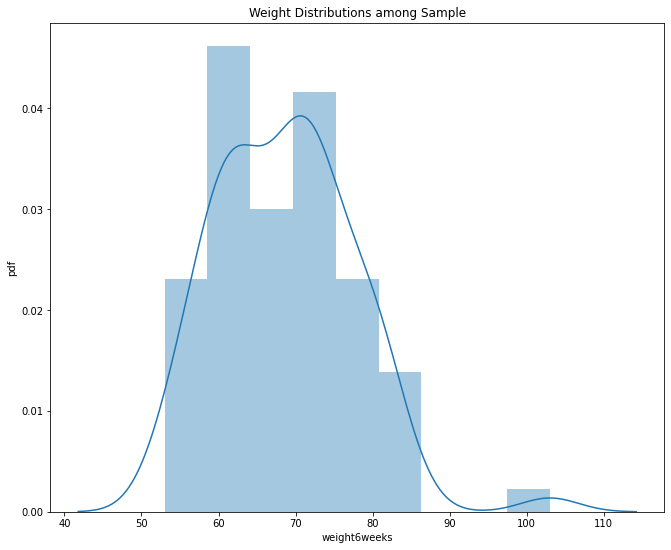

In [ ]:
#Phân bố trọng lượng của mẫu:

f, ax = plt.subplots( figsize = (11,9) )  
plt.title( 'Weight Distributions among Sample' )  
plt.ylabel( 'pdf' )  
sns.distplot( df.weight6weeks )  
plt.show()  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


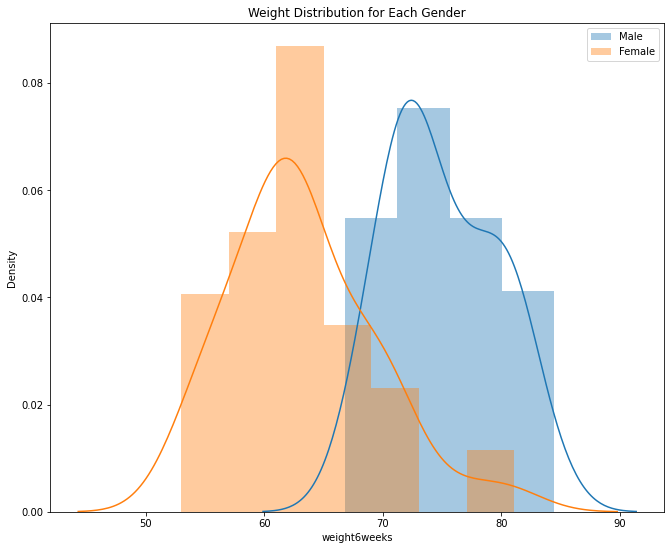

In [ ]:
#Biểu đồ phân phối cho từng Giới tính trong tập dữ liệu:

f, ax = plt.subplots( figsize = (11,9) )  
sns.distplot( mydata[mydata.gender == '1'].weight6weeks, ax = ax, label = 'Male')  
sns.distplot( mydata[mydata.gender == '0'].weight6weeks, ax = ax, label = 'Female')  
plt.title( 'Weight Distribution for Each Gender' )  
plt.legend()  
plt.show()  



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

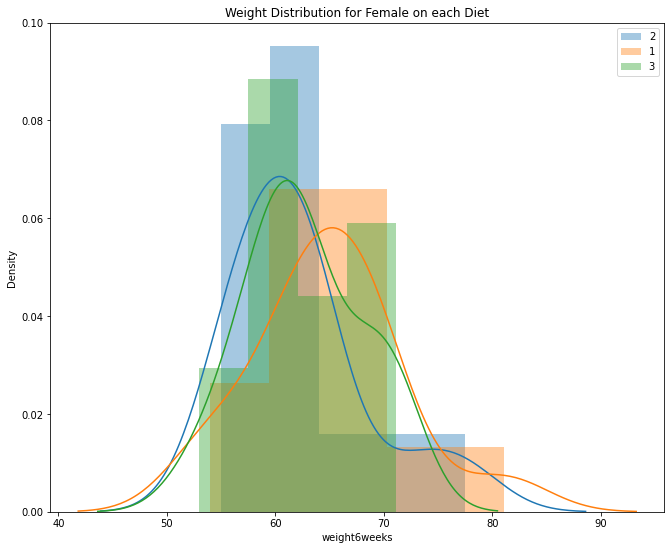

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

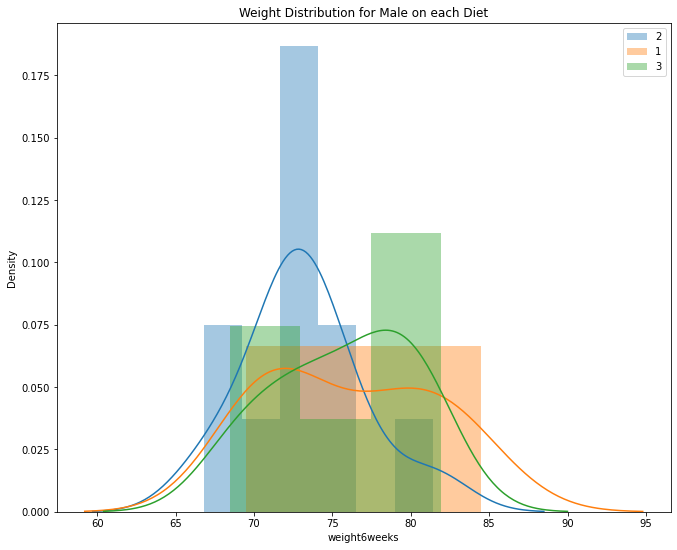

In [ ]:
#Biểu đồ phân bố cho từng Giới tính:

def infergender(x):  
    if x == '1':   
        return 'Male'  
      
    if x == '0':  
        return 'Female'  
      
    return 'Other'  
  
def showdistribution(df, gender, column, group):  
    f, ax = plt.subplots( figsize = (11, 9) )  
    plt.title( 'Weight Distribution for {} on each {}'.format(gender, column) )  
    for groupmember in group:  
        sns.distplot(df[df[column] == groupmember].weight6weeks, label='{}'.format(groupmember))  
    plt.legend()  
    plt.show()  
      
uniquediet = mydata.Diet.unique()  
uniquegender = mydata.gender.unique()  
  
for gender in uniquegender:  
    if gender != ' ':  
        showdistribution(mydata[mydata.gender == gender], infergender(gender), 'Diet', uniquediet)  


In [ ]:
#Thống kê này trên cơ sở giới tính cũng như chế độ ăn uống:

print(df.groupby('gender').agg(  
    [ np.mean, np.median, np.count_nonzero, np.std ]  
).weight6weeks) 

             mean  median  count_nonzero        std
gender                                             
        81.500000    81.5              2  30.405592
0       63.223256    62.4             43   6.150874
1       75.015152    73.9             33   4.629398


In [ ]:
diet1 = mydata[mydata["Diet"] == 1]
diet2 = mydata[mydata["Diet"] == 2]
diet3 = mydata[mydata["Diet"] == 3]

In [ ]:
weight_loss1 = diet1["pre.weight"] - diet1["weight6weeks"]
weight_loss2 = diet2["pre.weight"] - diet2["weight6weeks"]
weight_loss3 = diet3["pre.weight"] - diet3["weight6weeks"]

In [ ]:
print(weight_loss1)

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
7     2.0
8     2.0
9     8.5
10    1.9
11    3.1
12    1.5
13    3.0
14    3.6
15    0.9
45   -0.6
46    1.1
47    4.5
48    4.1
49    9.0
50    2.4
51    3.9
52    3.5
53    5.1
54    3.5
dtype: float64


In [ ]:
print(weight_loss2)

0     0.0
1     0.0
16   -2.1
17    2.0
18    1.7
19    4.3
20    7.0
21    0.6
22    2.7
23    3.6
24    3.0
25    2.0
26    4.2
27    4.7
28    3.3
29   -0.5
55    4.2
56    2.4
57    5.8
58    3.5
59    5.3
60    1.7
61    5.4
62    6.1
63    7.9
64   -1.4
65    4.3
dtype: float64


In [ ]:
print(weight_loss3)

30    7.0
31    5.6
32    3.4
33    6.8
34    7.8
35    5.4
36    6.8
37    7.2
38    7.0
39    7.3
40    0.9
41    7.6
42    4.1
43    6.3
44    5.0
66    2.5
67    0.9
68    3.5
69    0.5
70    2.8
71    8.6
72    4.5
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
dtype: float64


In [ ]:
import scipy.stats as stats

stats.f_oneway(weight_loss1, weight_loss2, weight_loss3)

F_onewayResult(statistic=6.197447453165349, pvalue=0.0032290142385893524)

In [ ]:
n = 8
a = n*[0]
def print_board(b):
   l = len(b)
   for i in range(l):
      for j in range(l):
         if j == a[i]:
            print(1, end = " ")
         else:
            print(0, end = " ")
      print()
def possible(d, c):
   for i in range(d):
      # if a[i] == y or abs(i - x) == abs(a[i] - y):
      if a[i] == c  or c - d == a[i] - i or c + d == a[i] + i:
         return False
   return True
def gen(i, n):
   for j in range(n):
      if possible(i,j):
         a[i] = j
         if i == n - 1:
            print(a)
         gen(i+1, n)
gen(0, n)


[0, 4, 7, 5, 2, 6, 1, 3]
[0, 5, 7, 2, 6, 3, 1, 4]
[0, 6, 3, 5, 7, 1, 4, 2]
[0, 6, 4, 7, 1, 3, 5, 2]
[1, 3, 5, 7, 2, 0, 6, 4]
[1, 4, 6, 0, 2, 7, 5, 3]
[1, 4, 6, 3, 0, 7, 5, 2]
[1, 5, 0, 6, 3, 7, 2, 4]
[1, 5, 7, 2, 0, 3, 6, 4]
[1, 6, 2, 5, 7, 4, 0, 3]
[1, 6, 4, 7, 0, 3, 5, 2]
[1, 7, 5, 0, 2, 4, 6, 3]
[2, 0, 6, 4, 7, 1, 3, 5]
[2, 4, 1, 7, 0, 6, 3, 5]
[2, 4, 1, 7, 5, 3, 6, 0]
[2, 4, 6, 0, 3, 1, 7, 5]
[2, 4, 7, 3, 0, 6, 1, 5]
[2, 5, 1, 4, 7, 0, 6, 3]
[2, 5, 1, 6, 0, 3, 7, 4]
[2, 5, 1, 6, 4, 0, 7, 3]
[2, 5, 3, 0, 7, 4, 6, 1]
[2, 5, 3, 1, 7, 4, 6, 0]
[2, 5, 7, 0, 3, 6, 4, 1]
[2, 5, 7, 0, 4, 6, 1, 3]
[2, 5, 7, 1, 3, 0, 6, 4]
[2, 6, 1, 7, 4, 0, 3, 5]
[2, 6, 1, 7, 5, 3, 0, 4]
[2, 7, 3, 6, 0, 5, 1, 4]
[3, 0, 4, 7, 1, 6, 2, 5]
[3, 0, 4, 7, 5, 2, 6, 1]
[3, 1, 4, 7, 5, 0, 2, 6]
[3, 1, 6, 2, 5, 7, 0, 4]
[3, 1, 6, 2, 5, 7, 4, 0]
[3, 1, 6, 4, 0, 7, 5, 2]
[3, 1, 7, 4, 6, 0, 2, 5]
[3, 1, 7, 5, 0, 2, 4, 6]
[3, 5, 0, 4, 1, 7, 2, 6]
[3, 5, 7, 1, 6, 0, 2, 4]
[3, 5, 7, 2, 0, 6, 4, 1]
[3, 6, 0, 7, 4, 1, 5, 2]


In [ ]:
#ANOVA Test:

mymod = ols('Height ~ Diet', data = mydata[mydata.gender == '0']).fit()  

aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Female')  
print('----------------------')  
print(aovtable)  
print()  
  
mod = ols('Height ~ Diet', data = mydata[mydata.gender=='1']).fit()  
# type 2 anova test  
aovtable = sm.stats.anova_lm(mymod, typ = 2)  
print('ANOVA table for Male')  
print('----------------------')  
print(aovtable)  


ANOVA table for Female
----------------------
               sum_sq    df        F    PR(>F)
Diet       559.680764   1.0  7.17969  0.010566
Residual  3196.086677  41.0      NaN       NaN

ANOVA table for Male
----------------------
               sum_sq    df        F    PR(>F)
Diet       559.680764   1.0  7.17969  0.010566
Residual  3196.086677  41.0      NaN       NaN


In [ ]:
#Xác định nhóm ăn kiêng:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison  
 
mydf = mydata[mydata.gender == '0']  
  
  
multiComp = MultiComparison(mydf['Height'], mydf['Diet'])  
tukeyres = multiComp.tukeyhsd(alpha = 0.05)  
  
print(tukeyres)  
print('Unique diet groups: ', multiComp.groupsunique)  


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2  -3.5714 0.5437 -11.7861  4.6432  False
     1      3  -8.7714 0.0307  -16.848 -0.6948   True
     2      3     -5.2 0.2719 -13.2766  2.8766  False
-----------------------------------------------------
Unique diet groups:  [1 2 3]


Có bằng chứng để bác bỏ giả thuyết null  $H_0$
-


*   Mục danh sách
*   Mục danh sách

